In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [112]:
# 4 CPUs
file = '/home/yongha/mcwa/1DFreeFormDQN/experiments/DQN/2022_09_16_14_07_47/wl900.0_angle60.0_ncells64/comp_table.csv'
df = pd.read_csv(file)
df.drop('Unnamed: 0', axis=1, inplace=True)

# TMM to reticolo

In [113]:
A, B = 'mcwat', 'reti'

In [114]:
df['gap-1'] = df[f'{A}-1'] - df[f'{B}-1']
df['gap0'] = df[f'{A}0'] - df[f'{B}0']
df['gap+1'] = df[f'{A}+1'] - df[f'{B}+1']
df['t_gap'] = df[f't_{A}'] - df[f't_{B}']
df['tpr_gap'] = df[f'tpr_{A}'] - df[f'tpr_{B}']

# Benchmark

## abs(difference in transmittance)

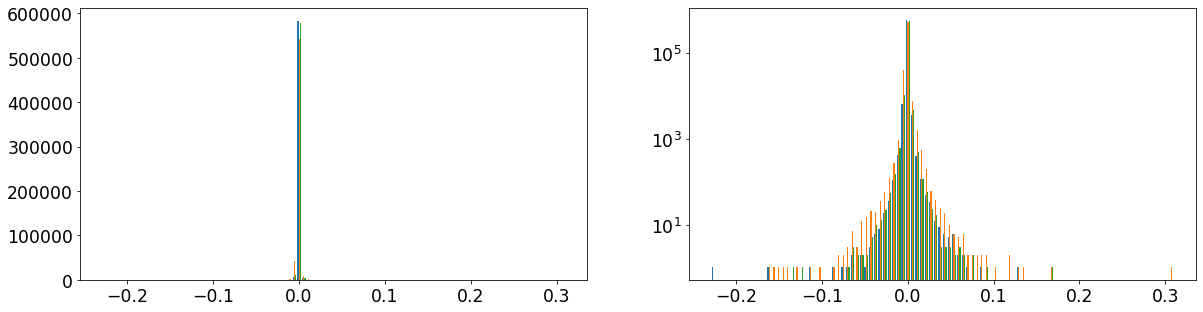

In [115]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df['gap-1'], df['gap0'], df['gap+1']], bins=100)
axes[1].hist([df['gap-1'], df['gap0'], df['gap+1']], bins=100)
axes[1].set_yscale('log')
plt.show()

In [116]:
df[['gap-1','gap0','gap+1']].describe().T

,count,mean,std,min,25%,50%,75%,max
gap-1,594421.0,0.000198,0.001239,-0.228532,-0.000061,0.000189,0.000552,0.127314
gap0,594421.0,-0.000797,0.002068,-0.163046,-0.001520,-0.000786,-0.000214,0.309667
gap+1,594421.0,0.000226,0.001341,-0.135228,-0.000003,0.000234,0.000642,0.167910


In [117]:
df[abs(df['gap-1'])>0.01][[f'{A}-1', f'{B}-1', 'gap-1']].sort_values('gap-1')

,mcwat-1,reti-1,gap-1
480529,0.094510,0.323042,-0.228532
42308,0.092712,0.252867,-0.160155
366731,0.148927,0.260372,-0.111446
567410,0.281742,0.367697,-0.085956
406805,0.196346,0.271126,-0.074780
...,...,...,...
346430,0.444971,0.382783,0.062188
319463,0.090466,0.027256,0.063209
145225,0.463249,0.393278,0.069971
496101,0.422662,0.334733,0.087930


In [118]:
df[abs(df['gap0'])>0.01][[f'{A}0', f'{B}0', 'gap0']].sort_values('gap0')

,mcwat0,reti0,gap0
384373,0.481271,0.644317,-0.163046
220106,0.364626,0.518056,-0.153430
214278,0.299640,0.451038,-0.151398
173898,0.183208,0.330409,-0.147201
78914,0.410306,0.552522,-0.142217
...,...,...,...
42140,0.425227,0.305553,0.119674
478509,0.291000,0.163725,0.127275
406805,0.364522,0.227963,0.136558
366731,0.381150,0.212253,0.168897


In [119]:
df[abs(df['gap+1'])>0.01][[f'{A}+1', f'{B}+1', 'gap+1']].sort_values('gap+1')

,mcwat+1,reti+1,gap+1
419167,0.219235,0.354463,-0.135228
42308,0.106590,0.232044,-0.125454
145225,0.181995,0.254182,-0.072186
513333,0.303447,0.369786,-0.066338
520885,0.294091,0.357196,-0.063105
...,...,...,...
98752,0.113956,0.049898,0.064059
208066,0.111853,0.037305,0.074548
240597,0.401517,0.326221,0.075296
478509,0.157208,0.066974,0.090234


## Normalized abs(difference in transmittance) 

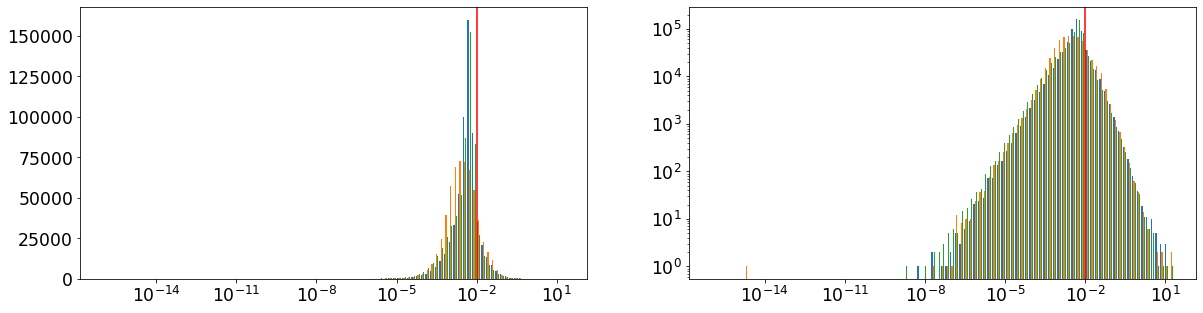

In [120]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(0.01, c='r')
axes[1].axvline(0.01, c='r')

axes[0].hist([abs(df['gap-1']/df[f'{A}-1']), abs(df['gap0']/df[f'{A}0']), abs(df['gap+1']/df[f'{A}+1'])], bins=np.logspace(np.log10(1E-16), np.log10(20),100))
axes[0].set_xscale('log')

axes[1].hist([abs(df['gap-1']/df[f'{A}-1']), abs(df['gap0']/df[f'{A}0']), abs(df['gap+1']/df[f'{A}+1'])], bins=np.logspace(np.log10(1E-16), np.log10(20),100))
axes[1].set_xscale('log')
axes[1].set_yscale('log')

plt.show()

right side of vertical red line: normalized error >= 1 %

orange is 0th order

In [121]:
df[abs(df['gap-1']/df[f'{A}-1'])>0.01][[f'{A}-1', f'{B}-1', 'gap-1']].sort_values('gap-1')

,mcwat-1,reti-1,gap-1
480529,0.094510,0.323042,-0.228532
42308,0.092712,0.252867,-0.160155
366731,0.148927,0.260372,-0.111446
567410,0.281742,0.367697,-0.085956
406805,0.196346,0.271126,-0.074780
...,...,...,...
346430,0.444971,0.382783,0.062188
319463,0.090466,0.027256,0.063209
145225,0.463249,0.393278,0.069971
496101,0.422662,0.334733,0.087930


In [122]:
df[abs(df['gap0']/df[f'{A}0'])>0.01][[f'{A}0', f'{B}0', 'gap0']].sort_values('gap0')

,mcwat0,reti0,gap0
384373,0.481271,0.644317,-0.163046
220106,0.364626,0.518056,-0.153430
214278,0.299640,0.451038,-0.151398
173898,0.183208,0.330409,-0.147201
78914,0.410306,0.552522,-0.142217
...,...,...,...
42140,0.425227,0.305553,0.119674
478509,0.291000,0.163725,0.127275
406805,0.364522,0.227963,0.136558
366731,0.381150,0.212253,0.168897


In [123]:
df[abs(df['gap+1']/df[f'{A}+1'])>0.01][[f'{A}+1', f'{B}+1', 'gap+1']].sort_values('gap+1')

,mcwat+1,reti+1,gap+1
419167,0.219235,0.354463,-0.135228
42308,0.106590,0.232044,-0.125454
145225,0.181995,0.254182,-0.072186
513333,0.303447,0.369786,-0.066338
520885,0.294091,0.357196,-0.063105
...,...,...,...
98752,0.113956,0.049898,0.064059
208066,0.111853,0.037305,0.074548
240597,0.401517,0.326221,0.075296
478509,0.157208,0.066974,0.090234


# benchmark - simulation time

## run time by time.time()

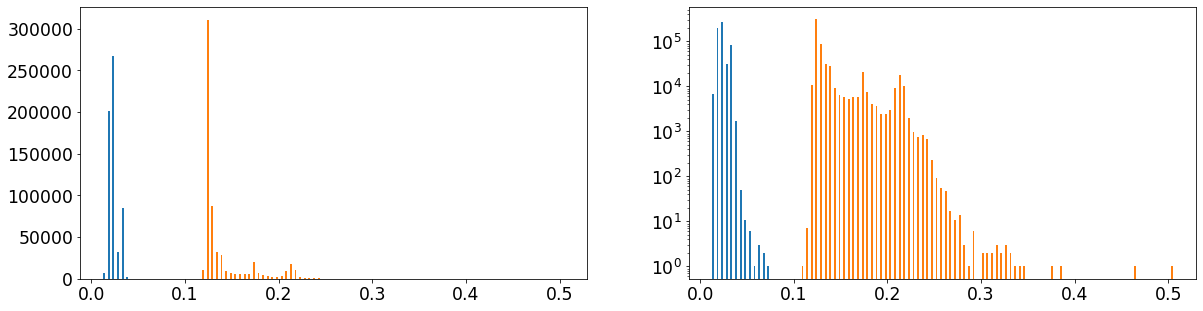

In [124]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df[f't_{A}'],df[f't_{B}']], bins=100)
axes[1].hist([df[f't_{A}'],df[f't_{B}']], bins=100, log=True)
plt.show()

Blue is  meent with TMM, Oragne is meent with reticolo

## reticolo time / meent time

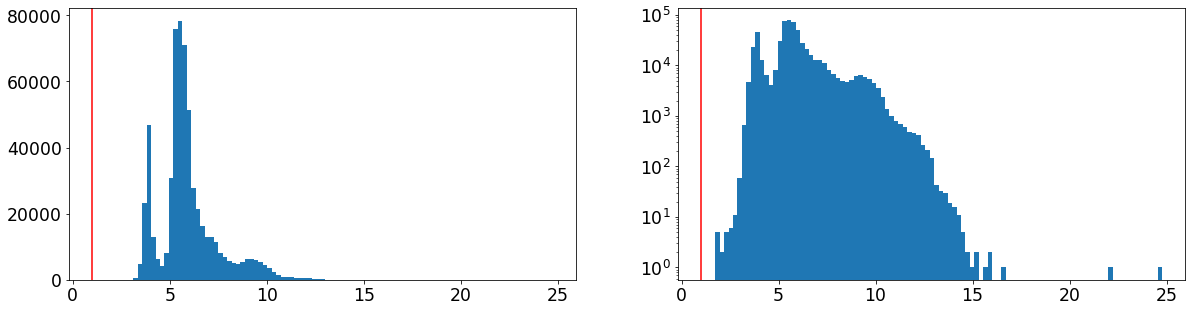

In [125]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(1, c='r')
axes[1].axvline(1, c='r')
axes[0].hist((df[f't_{B}'])/df[f't_{A}'], bins=100)
axes[1].hist((df[f't_{B}'])/df[f't_{A}'], bins=100)
axes[1].set_yscale('log')
plt.show()

In [126]:
pd.DataFrame((df[f't_{B}']/df[f't_{A}']).describe()).T

,count,mean,std,min,25%,50%,75%,max
0,594421.0,5.915973,1.529872,1.727486,5.222967,5.659339,6.367995,24.769837


meent-TMM is faster 5.7 times than reticolo.

right side of red line: TMM is faster

## time.process_time()

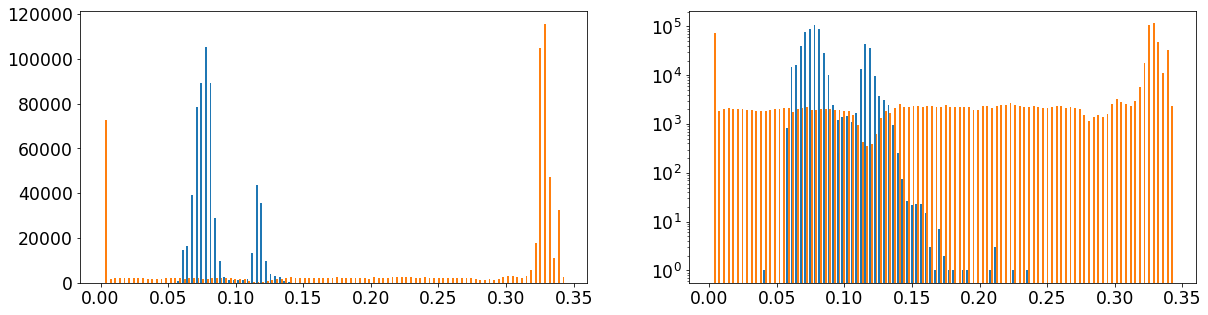

In [127]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df[f'tpr_{A}'],df[f'tpr_{B}']], bins=100)
axes[1].hist([df[f'tpr_{A}'],df[f'tpr_{B}']], bins=100, log=True)
plt.show()

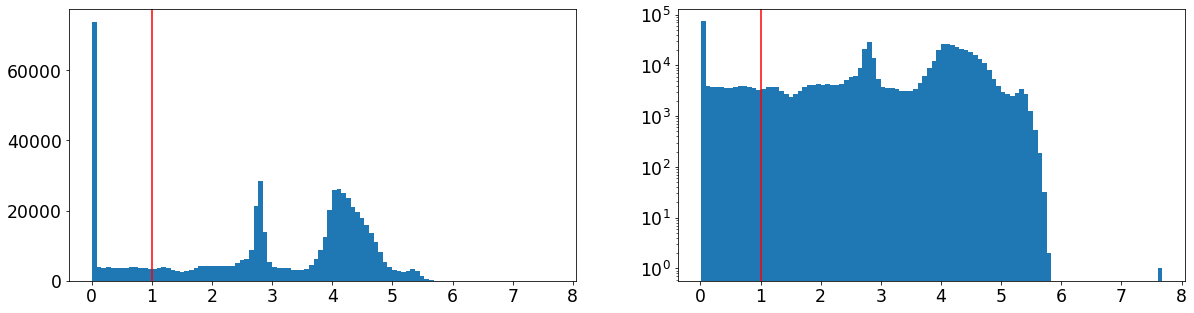

In [128]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(1, c='r')
axes[1].axvline(1, c='r')
axes[0].hist((df[f'tpr_{B}'])/df[f'tpr_{A}'], bins=100)
axes[1].hist((df[f'tpr_{B}'])/df[f'tpr_{A}'], bins=100)
axes[1].set_yscale('log')
plt.show()

In [129]:
pd.DataFrame((df[f'tpr_{B}']/df[f'tpr_{A}']).describe()).T

,count,mean,std,min,25%,50%,75%,max
0,594421.0,2.928232,1.641464,0.009937,1.732354,3.396479,4.260506,7.676966


hard to tell...